In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# HW1 Part 1
## Assignment 2

In [2]:
smooth = pd.read_csv("smooth.csv")
smooth = smooth.set_index('thread_num')
smooth

,smooth,count-x,count-y
thread_num,,,
1,1.497060,1.727230,0.718882
2,0.792415,0.901926,0.384049
4,0.410363,0.449397,0.194857
8,0.213664,0.226211,0.100942
16,0.164361,0.119336,0.052824
32,0.196564,0.084409,0.050619
64,0.244644,0.129860,0.079526


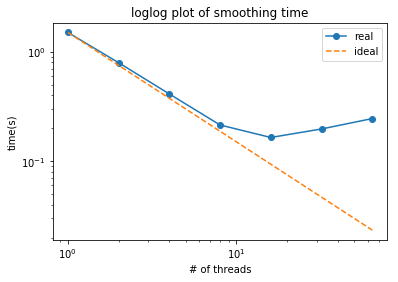

In [9]:
plt.loglog(smooth['smooth'], 'o-', label='real')
plt.loglog(2**np.arange(7), 1.497800*0.5**np.arange(7), '--', label='ideal')
plt.title('loglog plot of smoothing time')
plt.xlabel('# of threads')
plt.ylabel('time(s)')
plt.legend()
plt.show()

# HW1 Part 2

## Part a

In [72]:
df_a = pd.read_csv("OpenMP HW1 P2 - part_a.csv")
df_aInit = pd.read_csv("OpenMP HW1 P2 - part_a_init.csv")
df_b = pd.read_csv("OpenMP HW1 P2 - part_b.csv")
df_c = pd.read_csv("OpenMP HW1 P2 - part_c - mean.csv")
df_cFuse = pd.read_csv("OpenMP HW1 P2 - part_c_fuse_mean.csv")

In [73]:
for df in [df_a, df_aInit, df_b, df_c, df_cFuse]:
    df.set_index('NUM_THREADS', inplace=True)

In [14]:
df_a

,"schedule: STATIC,100","schedule: dynamic,100",schedule: STATIC,"schedule: dynamic,100000"
NUM_THREADS,,,,
1,0.765165,0.764066,0.763000,0.763667
2,1.677657,2.332998,0.573981,0.585297
3,1.203009,1.540108,0.364196,0.381306
4,0.976079,1.291645,0.306058,0.316510
5,0.769259,1.143199,0.246914,0.262796
6,0.674144,1.022997,0.255888,0.243497
7,0.691015,0.843999,0.214504,0.237037
8,0.589478,0.782279,0.190188,0.216614


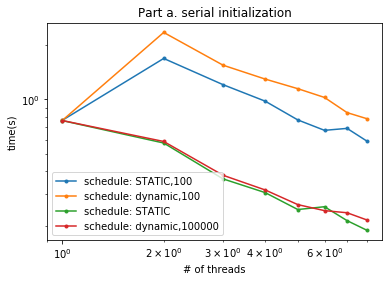

In [45]:
for col in df_a.columns:
    plt.loglog(df_a[col], '.-', label=col)
    
plt.xlabel("# of threads")
plt.ylabel("time(s)")
plt.title('Part a. serial initialization')
plt.legend()
plt.show()

In [26]:
df_aInit

,"schedule: STATIC,100","schedule: dynamic,100",schedule: STATIC,"schedule: dynamic,100000"
NUM_THREADS,,,,
1,0.764363,0.765123,0.766278,0.769578
2,1.631382,2.328546,0.378046,0.591135
3,1.154331,1.535651,0.268857,0.394848
4,0.940844,1.397959,0.202287,0.317303
5,0.752718,1.159553,0.170605,0.260254
6,0.678395,0.921162,0.141410,0.233131
7,0.605195,0.792951,0.130665,0.213373
8,0.570286,0.747190,0.149798,0.205378


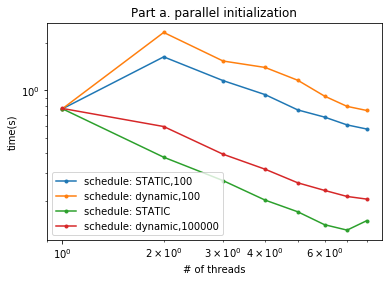

In [46]:
for col in df_aInit.columns:
    plt.loglog(df_aInit[col], '.-', label=col)
    
plt.xlabel("# of threads")
plt.ylabel("time(s)")
plt.title('Part a. parallel initialization')
plt.legend()
plt.show()

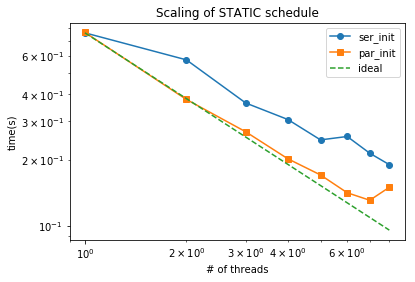

In [36]:
plt.loglog(df_a['schedule: STATIC'],'o-', label='ser_init')
plt.loglog(df_aInit['schedule: STATIC'],'s-', label='par_init')
plt.loglog(range(1,9), 0.763000/np.arange(1,9), '--', label='ideal')
plt.title("Scaling of STATIC schedule")
plt.xlabel("# of threads")
plt.ylabel("time(s)")
plt.legend()
plt.show()

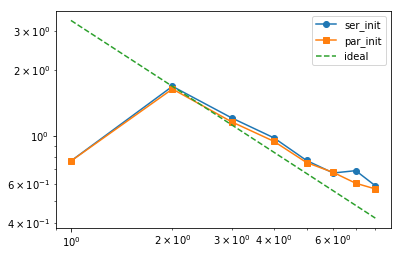

In [25]:
plt.loglog(df_a['schedule: STATIC,100'],'o-', label='ser_init')
plt.loglog(df_aInit['schedule: STATIC,100'],'s-', label='par_init')
plt.loglog(range(1,9), 2*1.677657/np.arange(1,9), '--', label='ideal')
plt.legend()
plt.show()

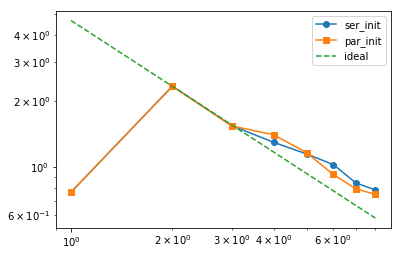

In [27]:
plt.loglog(df_a['schedule: dynamic,100'],'o-', label='ser_init')
plt.loglog(df_aInit['schedule: dynamic,100'],'s-', label='par_init')
plt.loglog(range(1,9), 2*2.328546/np.arange(1,9), '--', label='ideal')
plt.legend()
plt.show()

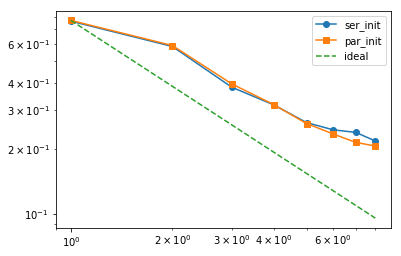

In [29]:
plt.loglog(df_a['schedule: dynamic,100000'],'o-', label='ser_init')
plt.loglog(df_aInit['schedule: dynamic,100000'],'s-', label='par_init')
plt.loglog(range(1,9), 0.769578/np.arange(1,9), '--', label='ideal')
plt.legend()
plt.show()

## Part b
no significant change

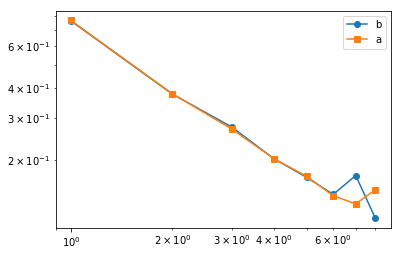

In [32]:
plt.loglog(df_b['schedule: STATIC'],'o-', label='b')
plt.loglog(df_aInit['schedule: STATIC'],'s-', label='a')
plt.legend()
plt.show()

In [47]:
df_b

,"schedule: STATIC,100","schedule: dynamic,100",schedule: STATIC,"schedule: dynamic,100000"
NUM_THREADS,,,,
1,0.782323,0.763951,0.762468,0.761592
2,1.643496,2.262333,0.376525,0.592298
3,1.162260,1.580859,0.274278,0.396029
4,0.973758,1.316508,0.202056,0.314592
5,0.786616,1.134934,0.168865,0.262409
6,0.642602,0.985059,0.143222,0.240842
7,0.621218,0.831738,0.171723,0.216653
8,0.565453,0.756978,0.113890,0.200232


## Part c

In [61]:
df_c

,"schedule: STATIC,100","schedule: dynamic,100",schedule: STATIC,"schedule: dynamic,100000"
NUM_THREADS,,,,
1,0.765962,0.766501,0.763561,0.767981
2,1.352403,1.338105,0.376965,0.468663
3,0.895110,0.957317,0.268202,0.331034
4,0.744691,0.818544,0.214874,0.270260
5,0.608436,0.695532,0.178318,0.230518
6,0.513589,0.595938,0.149990,0.215437
7,0.462823,0.536792,0.164702,0.202960
8,0.401632,0.479722,0.145119,0.187916
9,0.375117,0.446157,0.132788,0.175387


In [70]:
df_cFuse

,"schedule: STATIC,100","schedule: dynamic,100",schedule: STATIC,"schedule: dynamic,100000"
NUM_THREADS,,,,
1,0.558736,0.558122,0.558964,0.557034
2,0.814787,0.720707,0.269985,0.325405
3,0.540181,0.555637,0.194001,0.231978
4,0.439943,0.457882,0.148014,0.189451
5,0.361802,0.376000,0.139378,0.164223
6,0.313304,0.328141,0.102142,0.143889
7,0.266694,0.291515,0.105062,0.134121
8,0.241653,0.268991,0.105622,0.125908
9,0.230068,0.243474,0.103139,0.119170


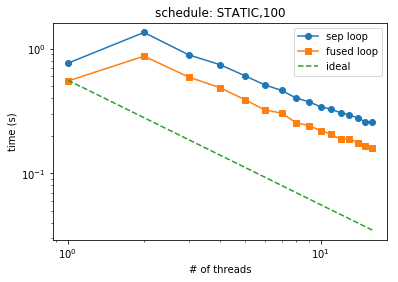

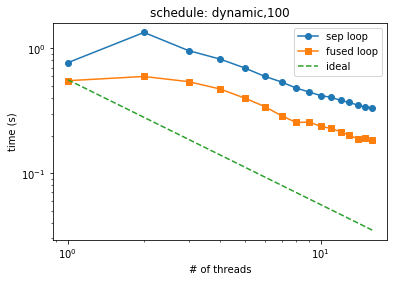

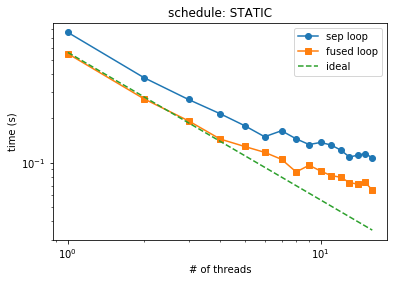

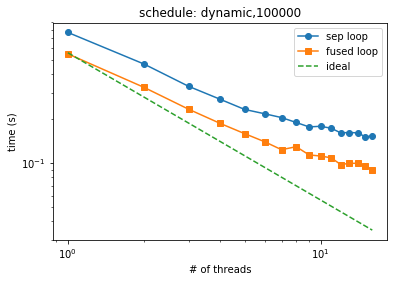

In [74]:
for col in df_c.columns:
    plt.figure()
    plt.title(col)
    plt.loglog(df_c[col], 'o-', label='sep loop')
    plt.loglog(df_cFuse[col], 's-', label='fused loop')
    plt.loglog(range(1,17), 0.558964/np.arange(1,17), '--', label='ideal')
    plt.xlabel('# of threads')
    plt.ylabel('time (s)')
    plt.legend()
    
plt.show()

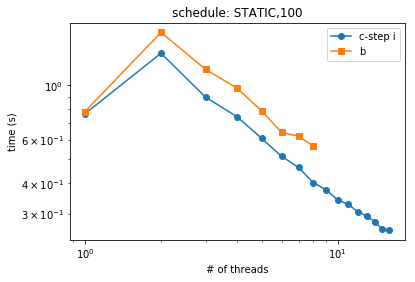

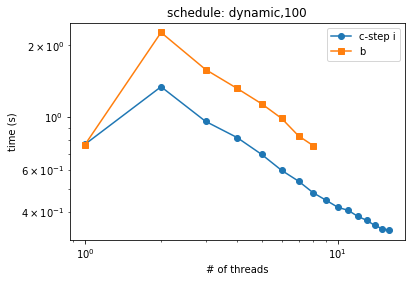

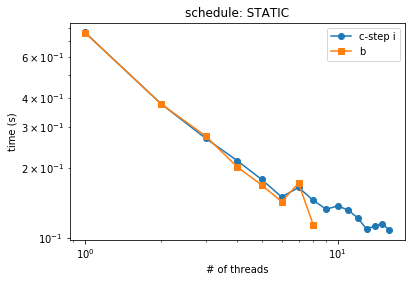

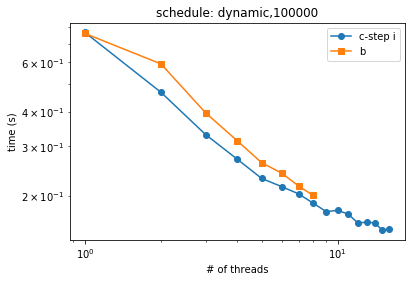

In [64]:
for col in df_c.columns:
    plt.figure()
    plt.loglog(df_c[col], 'o-', label = 'c-step i')
    plt.loglog(df_b[col], 's-', label = 'b')
    plt.title(col)
    plt.legend()
    plt.xlabel('# of threads')
    plt.ylabel('time (s)')

plt.show()